In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import datetime

In [4]:

warnings.filterwarnings('ignore')
df1 = pd.read_csv("/content/drive/MyDrive/cipla loan /train.csv")
df2 = pd.read_csv("/content/drive/MyDrive/cipla loan /test.csv")


In [5]:
df1

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,722.34,Y,Y,2.0,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,253.04,N,N,3.0,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,583.11,N,Y,NaN,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,378.29,N,Y,3.0,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


In [6]:
df1.columns = df1.columns.str.replace(' ','_')

In [7]:
df1.rename(columns={'Income_(USD)':'Income','Loan_Amount_Request_(USD)':'Loan_Amount_Request','Current_Loan_Expenses_(USD)':'Current_Loan_Expenses','Loan_Sanction_Amount_(USD)':'Loan_Sanction_Amount'}, inplace=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             30000 non-null  object 
 1   Name                    30000 non-null  object 
 2   Gender                  29947 non-null  object 
 3   Age                     30000 non-null  int64  
 4   Income                  25424 non-null  float64
 5   Income_Stability        28317 non-null  object 
 6   Profession              30000 non-null  object 
 7   Type_of_Employment      22730 non-null  object 
 8   Location                30000 non-null  object 
 9   Loan_Amount_Request     30000 non-null  float64
 10  Current_Loan_Expenses   29828 non-null  float64
 11  Expense_Type_1          30000 non-null  object 
 12  Expense_Type_2          30000 non-null  object 
 13  Dependents              27507 non-null  float64
 14  Credit_Score            28297 non-null

In [9]:
df1.isna().sum()

Customer_ID                  0
Name                         0
Gender                      53
Age                          0
Income                    4576
Income_Stability          1683
Profession                   0
Type_of_Employment        7270
Location                     0
Loan_Amount_Request          0
Current_Loan_Expenses      172
Expense_Type_1               0
Expense_Type_2               0
Dependents                2493
Credit_Score              1703
No._of_Defaults              0
Has_Active_Credit_Card    1566
Property_ID                  0
Property_Age              4850
Property_Type                0
Property_Location          356
Co-Applicant                 0
Property_Price               0
Loan_Sanction_Amount       340
dtype: int64

In [10]:
for i in range(len(df1)):
  if(df1.Location[i]=='Semi-Urban' and df1.Income.isna()[i]==True):
    if(df1.Profession[i]=='Working'):
      df1.Income[i]=2199.789
    if(df1.Profession[i]=='Pensioner'):
      df1.Income[i]=1736.2972
    if(df1.Profession[i]=='State servant'):
      df1.Income[i]=2137.1430
    if(df1.Profession[i]=='Commercial associate'):
      df1.Income[i]=2380.2356
    if(df1.Profession[i]=='Student'):
      df1.Income[i]=1914.58
    if(df1.Profession[i]=='Unemployed'):
      df1.Income[i]=0
    if(df1.Profession[i]=='Businessman'):
      df1.Income[i]=2551.67
  
  if(df1.Location[i]=='Rural' and df1.Income.isna()[i]==True):
    if(df1.Profession[i]=='Working'):
      df1.Income[i]=1922.3272
    if(df1.Profession[i]=='Pensioner'):
      df1.Income[i]=1798.664
    if(df1.Profession[i]=='State servant'):
      df1.Income[i]=2074.60
    if(df1.Profession[i]=='Commercial associate'):
      df1.Income[i]=2190.961
    if(df1.Profession[i]=='Unemployed'):
      df1.Income[i]=805.37
  
  if(df1.Location[i]=='Urban' and df1.Income.isna()[i]==True):
    if(df1.Profession[i]=='Working'):
      df1.Income[i]=2845.196
    if(df1.Profession[i]=='Pensioner'):
      df1.Income[i]=2601.462
    if(df1.Profession[i]=='State servant'):
      df1.Income[i]=3207.1576
    if(df1.Profession[i]=='Commercial associate'):
      df1.Income[i]=3411.326
    if(df1.Profession[i]=='Maternity leave'):
      df1.Income[i]=0
    if(df1.Profession[i]=='Businessman'):
      df1.Income[i]=10300.31

In [11]:
for i in range(len(df1)):
  if(df1.Income_Stability.isna()[i]==True):
    if(df1.Profession[i]=='Pensioner' or df1.Profession[i]=='Unemployed'):
      df1.Income_Stability[i]='High'
    else:
      df1.Income_Stability[i]='Low'


In [12]:
df1

,Customer_ID,Name,Gender,Age,Income,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request,Current_Loan_Expenses,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount
0,C-36995,Frederica Shealy,F,56,1933.050,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.910,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.190,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,1798.664,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.770,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.410,Low,Commercial associate,Managers,Urban,76657.90,722.34,Y,Y,2.0,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.880,Low,Working,Laborers,Semi-Urban,66595.14,253.04,N,N,3.0,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,2845.196,Low,Working,Sales staff,Urban,81410.08,583.11,N,Y,NaN,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.710,Low,Working,Security staff,Semi-Urban,142524.10,378.29,N,Y,3.0,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


In [13]:
df1.isna().sum()

Customer_ID                  0
Name                         0
Gender                      53
Age                          0
Income                       0
Income_Stability             0
Profession                   0
Type_of_Employment        7270
Location                     0
Loan_Amount_Request          0
Current_Loan_Expenses      172
Expense_Type_1               0
Expense_Type_2               0
Dependents                2493
Credit_Score              1703
No._of_Defaults              0
Has_Active_Credit_Card    1566
Property_ID                  0
Property_Age              4850
Property_Type                0
Property_Location          356
Co-Applicant                 0
Property_Price               0
Loan_Sanction_Amount       340
dtype: int64

In [14]:
df1.Gender.unique()

array(['F', 'M', nan], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
df_temp = df1.astype("str").apply(LabelEncoder().fit_transform)
df_final = df_temp.where(~df1.isna(), df1)

In [16]:
df_final.head()

,Customer_ID,Name,Gender,Age,Income,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request,Current_Loan_Expenses,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount
0,18080,9529,0,38,8219,1,7,14,1,24660,5499,0,0,4,13662,0,NaN,718,8124,3,0,2,2864,14493
1,16076,1304,1,14,22202,1,7,NaN,1,19337,16428,0,1,0,11674,0,2,565,21972,1,0,2,22224,10896
2,18552,24595,0,47,24375,0,3,NaN,1,19036,2653,0,1,0,15206,0,2,496,24113,1,2,1,25619,10739
3,11046,29860,0,47,6728,0,3,NaN,0,26507,7886,0,1,3,15176,1,2,878,NaN,1,1,2,3049,14815
4,8991,190,0,13,14400,1,7,6,1,2140,16255,0,1,NaN,9214,1,0,684,14239,3,1,2,11489,18012


In [17]:
df1['Gender'] = df_final['Gender']
df1['Income_Stability'] = df_final['Income_Stability']
df1['Profession'] = df_final['Profession']
df1['Type_of_Employment'] = df_final['Type_of_Employment']
df1['Location'] = df_final['Location']
df1['Has_Active_Credit_Card'] = df_final['Has_Active_Credit_Card']
df1['Property_Location'] = df_final['Property_Location']
df1['Expense_Type_1'] = df_final['Expense_Type_1']
df1['Expense_Type_2'] = df_final['Expense_Type_2']

In [18]:
df1

,Customer_ID,Name,Gender,Age,Income,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request,Current_Loan_Expenses,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount
0,C-36995,Frederica Shealy,0,56,1933.050,1,7,14,1,72809.58,241.08,0,0,3.0,809.44,0,NaN,746,1933.05,4,0,1,119933.46,54607.18
1,C-33999,America Calderone,1,32,4952.910,1,7,NaN,1,46837.47,495.81,0,1,1.0,780.40,0,2,608,4952.91,2,0,1,54791.00,37469.98
2,C-3770,Rosetta Verne,0,65,988.190,0,3,NaN,1,45593.04,171.95,0,1,1.0,833.15,0,2,546,988.19,2,2,0,72440.58,36474.43
3,C-26480,Zoe Chitty,0,65,1798.664,0,3,NaN,0,80057.92,298.54,0,1,2.0,832.70,1,2,890,NaN,2,1,1,121441.51,56040.54
4,C-23459,Afton Venema,0,31,2614.770,1,7,6,1,113858.89,491.41,0,1,NaN,745.55,1,0,715,2614.77,4,1,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,1,38,4969.410,1,1,10,2,76657.90,722.34,1,1,2.0,869.61,0,2,566,4969.41,4,2,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,1,20,1606.880,1,7,8,1,66595.14,253.04,0,0,3.0,729.41,0,1,175,1606.88,3,2,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,0,49,2845.196,1,7,14,2,81410.08,583.11,0,1,NaN,NaN,0,0,959,NaN,1,0,1,102108.02,61057.56
29998,C-12172,Carolann Osby,1,38,2417.710,1,7,16,1,142524.10,378.29,0,1,3.0,677.27,1,2,375,2417.71,4,2,1,168194.47,99766.87


In [19]:
df11 = pd.DataFrame()
df11 = df1
df11.drop(columns=['Customer_ID','Name'],inplace=True)
df11

,Gender,Age,Income,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request,Current_Loan_Expenses,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount
0,0,56,1933.050,1,7,14,1,72809.58,241.08,0,0,3.0,809.44,0,NaN,746,1933.05,4,0,1,119933.46,54607.18
1,1,32,4952.910,1,7,NaN,1,46837.47,495.81,0,1,1.0,780.40,0,2,608,4952.91,2,0,1,54791.00,37469.98
2,0,65,988.190,0,3,NaN,1,45593.04,171.95,0,1,1.0,833.15,0,2,546,988.19,2,2,0,72440.58,36474.43
3,0,65,1798.664,0,3,NaN,0,80057.92,298.54,0,1,2.0,832.70,1,2,890,NaN,2,1,1,121441.51,56040.54
4,0,31,2614.770,1,7,6,1,113858.89,491.41,0,1,NaN,745.55,1,0,715,2614.77,4,1,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,38,4969.410,1,1,10,2,76657.90,722.34,1,1,2.0,869.61,0,2,566,4969.41,4,2,1,111096.56,68992.11
29996,1,20,1606.880,1,7,8,1,66595.14,253.04,0,0,3.0,729.41,0,1,175,1606.88,3,2,1,73453.94,46616.60
29997,0,49,2845.196,1,7,14,2,81410.08,583.11,0,1,NaN,NaN,0,0,959,NaN,1,0,1,102108.02,61057.56
29998,1,38,2417.710,1,7,16,1,142524.10,378.29,0,1,3.0,677.27,1,2,375,2417.71,4,2,1,168194.47,99766.87


In [20]:
df11.isna().sum()

Gender                      53
Age                          0
Income                       0
Income_Stability             0
Profession                   0
Type_of_Employment        7270
Location                     0
Loan_Amount_Request          0
Current_Loan_Expenses      172
Expense_Type_1               0
Expense_Type_2               0
Dependents                2493
Credit_Score              1703
No._of_Defaults              0
Has_Active_Credit_Card    1566
Property_ID                  0
Property_Age              4850
Property_Type                0
Property_Location          356
Co-Applicant                 0
Property_Price               0
Loan_Sanction_Amount       340
dtype: int64

In [21]:
df11.dtypes

Gender                     object
Age                         int64
Income                    float64
Income_Stability            int64
Profession                  int64
Type_of_Employment         object
Location                    int64
Loan_Amount_Request       float64
Current_Loan_Expenses     float64
Expense_Type_1              int64
Expense_Type_2              int64
Dependents                float64
Credit_Score              float64
No._of_Defaults             int64
Has_Active_Credit_Card     object
Property_ID                 int64
Property_Age              float64
Property_Type               int64
Property_Location          object
Co-Applicant                int64
Property_Price            float64
Loan_Sanction_Amount      float64
dtype: object

In [22]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputed_data = imputer.fit_transform(df11)  # impute all the missing data
df_temp = pd.DataFrame(imputed_data)
df_temp.columns = df11.columns
df1['Type_of_Employment'] = df_temp['Type_of_Employment']

In [23]:
df1['Has_Active_Credit_Card'] = df_temp['Has_Active_Credit_Card']
df1['Property_Location'] = df_temp['Property_Location']

In [24]:
df1['Gender'] = df_temp['Gender']

In [25]:
df1

,Gender,Age,Income,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request,Current_Loan_Expenses,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount
0,0.0,56,1933.050,1,7,14.0,1,72809.58,241.08,0,0,3.0,809.44,0,1.2,746,1933.05,4,0.0,1,119933.46,54607.18
1,1.0,32,4952.910,1,7,3.6,1,46837.47,495.81,0,1,1.0,780.40,0,2.0,608,4952.91,2,0.0,1,54791.00,37469.98
2,0.0,65,988.190,0,3,8.6,1,45593.04,171.95,0,1,1.0,833.15,0,2.0,546,988.19,2,2.0,0,72440.58,36474.43
3,0.0,65,1798.664,0,3,8.4,0,80057.92,298.54,0,1,2.0,832.70,1,2.0,890,NaN,2,1.0,1,121441.51,56040.54
4,0.0,31,2614.770,1,7,6.0,1,113858.89,491.41,0,1,NaN,745.55,1,0.0,715,2614.77,4,1.0,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,38,4969.410,1,1,10.0,2,76657.90,722.34,1,1,2.0,869.61,0,2.0,566,4969.41,4,2.0,1,111096.56,68992.11
29996,1.0,20,1606.880,1,7,8.0,1,66595.14,253.04,0,0,3.0,729.41,0,1.0,175,1606.88,3,2.0,1,73453.94,46616.60
29997,0.0,49,2845.196,1,7,14.0,2,81410.08,583.11,0,1,NaN,NaN,0,0.0,959,NaN,1,0.0,1,102108.02,61057.56
29998,1.0,38,2417.710,1,7,16.0,1,142524.10,378.29,0,1,3.0,677.27,1,2.0,375,2417.71,4,2.0,1,168194.47,99766.87


In [26]:
df1.isna().sum()

Gender                       0
Age                          0
Income                       0
Income_Stability             0
Profession                   0
Type_of_Employment           0
Location                     0
Loan_Amount_Request          0
Current_Loan_Expenses      172
Expense_Type_1               0
Expense_Type_2               0
Dependents                2493
Credit_Score              1703
No._of_Defaults              0
Has_Active_Credit_Card       0
Property_ID                  0
Property_Age              4850
Property_Type                0
Property_Location            0
Co-Applicant                 0
Property_Price               0
Loan_Sanction_Amount       340
dtype: int64

In [27]:
df1.Gender.value_counts()

1.0    15054
0.0    14897
0.4       16
0.6       16
0.2       10
0.8        7
Name: Gender, dtype: int64

In [28]:
df1['Dependents'].fillna(df1['Dependents'].mode()[0], inplace=True)

In [29]:
df1.isna().sum()

Gender                       0
Age                          0
Income                       0
Income_Stability             0
Profession                   0
Type_of_Employment           0
Location                     0
Loan_Amount_Request          0
Current_Loan_Expenses      172
Expense_Type_1               0
Expense_Type_2               0
Dependents                   0
Credit_Score              1703
No._of_Defaults              0
Has_Active_Credit_Card       0
Property_ID                  0
Property_Age              4850
Property_Type                0
Property_Location            0
Co-Applicant                 0
Property_Price               0
Loan_Sanction_Amount       340
dtype: int64

In [30]:
df1

,Gender,Age,Income,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request,Current_Loan_Expenses,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount
0,0.0,56,1933.050,1,7,14.0,1,72809.58,241.08,0,0,3.0,809.44,0,1.2,746,1933.05,4,0.0,1,119933.46,54607.18
1,1.0,32,4952.910,1,7,3.6,1,46837.47,495.81,0,1,1.0,780.40,0,2.0,608,4952.91,2,0.0,1,54791.00,37469.98
2,0.0,65,988.190,0,3,8.6,1,45593.04,171.95,0,1,1.0,833.15,0,2.0,546,988.19,2,2.0,0,72440.58,36474.43
3,0.0,65,1798.664,0,3,8.4,0,80057.92,298.54,0,1,2.0,832.70,1,2.0,890,NaN,2,1.0,1,121441.51,56040.54
4,0.0,31,2614.770,1,7,6.0,1,113858.89,491.41,0,1,2.0,745.55,1,0.0,715,2614.77,4,1.0,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,38,4969.410,1,1,10.0,2,76657.90,722.34,1,1,2.0,869.61,0,2.0,566,4969.41,4,2.0,1,111096.56,68992.11
29996,1.0,20,1606.880,1,7,8.0,1,66595.14,253.04,0,0,3.0,729.41,0,1.0,175,1606.88,3,2.0,1,73453.94,46616.60
29997,0.0,49,2845.196,1,7,14.0,2,81410.08,583.11,0,1,2.0,NaN,0,0.0,959,NaN,1,0.0,1,102108.02,61057.56
29998,1.0,38,2417.710,1,7,16.0,1,142524.10,378.29,0,1,3.0,677.27,1,2.0,375,2417.71,4,2.0,1,168194.47,99766.87


In [31]:
df1.Has_Active_Credit_Card = df1.Has_Active_Credit_Card.round()
df1.Property_Location = df1.Property_Location.round()
df1.Gender = df1.Gender.round()

In [32]:
df1.Type_of_Employment = df1.Type_of_Employment.round() 

In [33]:
df1

,Gender,Age,Income,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request,Current_Loan_Expenses,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount
0,0.0,56,1933.050,1,7,14.0,1,72809.58,241.08,0,0,3.0,809.44,0,1.0,746,1933.05,4,0.0,1,119933.46,54607.18
1,1.0,32,4952.910,1,7,4.0,1,46837.47,495.81,0,1,1.0,780.40,0,2.0,608,4952.91,2,0.0,1,54791.00,37469.98
2,0.0,65,988.190,0,3,9.0,1,45593.04,171.95,0,1,1.0,833.15,0,2.0,546,988.19,2,2.0,0,72440.58,36474.43
3,0.0,65,1798.664,0,3,8.0,0,80057.92,298.54,0,1,2.0,832.70,1,2.0,890,NaN,2,1.0,1,121441.51,56040.54
4,0.0,31,2614.770,1,7,6.0,1,113858.89,491.41,0,1,2.0,745.55,1,0.0,715,2614.77,4,1.0,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,38,4969.410,1,1,10.0,2,76657.90,722.34,1,1,2.0,869.61,0,2.0,566,4969.41,4,2.0,1,111096.56,68992.11
29996,1.0,20,1606.880,1,7,8.0,1,66595.14,253.04,0,0,3.0,729.41,0,1.0,175,1606.88,3,2.0,1,73453.94,46616.60
29997,0.0,49,2845.196,1,7,14.0,2,81410.08,583.11,0,1,2.0,NaN,0,0.0,959,NaN,1,0.0,1,102108.02,61057.56
29998,1.0,38,2417.710,1,7,16.0,1,142524.10,378.29,0,1,3.0,677.27,1,2.0,375,2417.71,4,2.0,1,168194.47,99766.87


In [34]:
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
import random

In [35]:
df1.isna().sum()

Gender                       0
Age                          0
Income                       0
Income_Stability             0
Profession                   0
Type_of_Employment           0
Location                     0
Loan_Amount_Request          0
Current_Loan_Expenses      172
Expense_Type_1               0
Expense_Type_2               0
Dependents                   0
Credit_Score              1703
No._of_Defaults              0
Has_Active_Credit_Card       0
Property_ID                  0
Property_Age              4850
Property_Type                0
Property_Location            0
Co-Applicant                 0
Property_Price               0
Loan_Sanction_Amount       340
dtype: int64

In [36]:
imputer = IterativeImputer(BayesianRidge())
impute_data = pd.DataFrame(imputer.fit_transform(df1))
impute_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.0,56.0,1933.050,1.0,7.0,14.0,1.0,72809.58,241.08,0.0,0.0,3.0,809.440000,0.0,1.0,746.0,1933.050,4.0,0.0,1.0,119933.46,54607.18
1,1.0,32.0,4952.910,1.0,7.0,4.0,1.0,46837.47,495.81,0.0,1.0,1.0,780.400000,0.0,2.0,608.0,4952.910,2.0,0.0,1.0,54791.00,37469.98
2,0.0,65.0,988.190,0.0,3.0,9.0,1.0,45593.04,171.95,0.0,1.0,1.0,833.150000,0.0,2.0,546.0,988.190,2.0,2.0,0.0,72440.58,36474.43
3,0.0,65.0,1798.664,0.0,3.0,8.0,0.0,80057.92,298.54,0.0,1.0,2.0,832.700000,1.0,2.0,890.0,1798.664,2.0,1.0,1.0,121441.51,56040.54
4,0.0,31.0,2614.770,1.0,7.0,6.0,1.0,113858.89,491.41,0.0,1.0,2.0,745.550000,1.0,0.0,715.0,2614.770,4.0,1.0,1.0,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,38.0,4969.410,1.0,1.0,10.0,2.0,76657.90,722.34,1.0,1.0,2.0,869.610000,0.0,2.0,566.0,4969.410,4.0,2.0,1.0,111096.56,68992.11
29996,1.0,20.0,1606.880,1.0,7.0,8.0,1.0,66595.14,253.04,0.0,0.0,3.0,729.410000,0.0,1.0,175.0,1606.880,3.0,2.0,1.0,73453.94,46616.60
29997,0.0,49.0,2845.196,1.0,7.0,14.0,2.0,81410.08,583.11,0.0,1.0,2.0,753.764633,0.0,0.0,959.0,2845.196,1.0,0.0,1.0,102108.02,61057.56
29998,1.0,38.0,2417.710,1.0,7.0,16.0,1.0,142524.10,378.29,0.0,1.0,3.0,677.270000,1.0,2.0,375.0,2417.710,4.0,2.0,1.0,168194.47,99766.87


In [37]:
impute_data.columns = df1.columns
impute_data

,Gender,Age,Income,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request,Current_Loan_Expenses,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount
0,0.0,56.0,1933.050,1.0,7.0,14.0,1.0,72809.58,241.08,0.0,0.0,3.0,809.440000,0.0,1.0,746.0,1933.050,4.0,0.0,1.0,119933.46,54607.18
1,1.0,32.0,4952.910,1.0,7.0,4.0,1.0,46837.47,495.81,0.0,1.0,1.0,780.400000,0.0,2.0,608.0,4952.910,2.0,0.0,1.0,54791.00,37469.98
2,0.0,65.0,988.190,0.0,3.0,9.0,1.0,45593.04,171.95,0.0,1.0,1.0,833.150000,0.0,2.0,546.0,988.190,2.0,2.0,0.0,72440.58,36474.43
3,0.0,65.0,1798.664,0.0,3.0,8.0,0.0,80057.92,298.54,0.0,1.0,2.0,832.700000,1.0,2.0,890.0,1798.664,2.0,1.0,1.0,121441.51,56040.54
4,0.0,31.0,2614.770,1.0,7.0,6.0,1.0,113858.89,491.41,0.0,1.0,2.0,745.550000,1.0,0.0,715.0,2614.770,4.0,1.0,1.0,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,38.0,4969.410,1.0,1.0,10.0,2.0,76657.90,722.34,1.0,1.0,2.0,869.610000,0.0,2.0,566.0,4969.410,4.0,2.0,1.0,111096.56,68992.11
29996,1.0,20.0,1606.880,1.0,7.0,8.0,1.0,66595.14,253.04,0.0,0.0,3.0,729.410000,0.0,1.0,175.0,1606.880,3.0,2.0,1.0,73453.94,46616.60
29997,0.0,49.0,2845.196,1.0,7.0,14.0,2.0,81410.08,583.11,0.0,1.0,2.0,753.764633,0.0,0.0,959.0,2845.196,1.0,0.0,1.0,102108.02,61057.56
29998,1.0,38.0,2417.710,1.0,7.0,16.0,1.0,142524.10,378.29,0.0,1.0,3.0,677.270000,1.0,2.0,375.0,2417.710,4.0,2.0,1.0,168194.47,99766.87


In [38]:
df1['Current_Loan_Expenses'] = impute_data['Current_Loan_Expenses']
df1['Credit_Score'] = impute_data['Credit_Score']
df1['Property_Age'] = impute_data['Property_Age']
df1['Loan_Sanction_Amount'] = impute_data['Loan_Sanction_Amount']

In [39]:
df1.isna().sum()

Gender                    0
Age                       0
Income                    0
Income_Stability          0
Profession                0
Type_of_Employment        0
Location                  0
Loan_Amount_Request       0
Current_Loan_Expenses     0
Expense_Type_1            0
Expense_Type_2            0
Dependents                0
Credit_Score              0
No._of_Defaults           0
Has_Active_Credit_Card    0
Property_ID               0
Property_Age              0
Property_Type             0
Property_Location         0
Co-Applicant              0
Property_Price            0
Loan_Sanction_Amount      0
dtype: int64

In [40]:
df1

,Gender,Age,Income,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request,Current_Loan_Expenses,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount
0,0.0,56,1933.050,1,7,14.0,1,72809.58,241.08,0,0,3.0,809.440000,0,1.0,746,1933.050,4,0.0,1,119933.46,54607.18
1,1.0,32,4952.910,1,7,4.0,1,46837.47,495.81,0,1,1.0,780.400000,0,2.0,608,4952.910,2,0.0,1,54791.00,37469.98
2,0.0,65,988.190,0,3,9.0,1,45593.04,171.95,0,1,1.0,833.150000,0,2.0,546,988.190,2,2.0,0,72440.58,36474.43
3,0.0,65,1798.664,0,3,8.0,0,80057.92,298.54,0,1,2.0,832.700000,1,2.0,890,1798.664,2,1.0,1,121441.51,56040.54
4,0.0,31,2614.770,1,7,6.0,1,113858.89,491.41,0,1,2.0,745.550000,1,0.0,715,2614.770,4,1.0,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,38,4969.410,1,1,10.0,2,76657.90,722.34,1,1,2.0,869.610000,0,2.0,566,4969.410,4,2.0,1,111096.56,68992.11
29996,1.0,20,1606.880,1,7,8.0,1,66595.14,253.04,0,0,3.0,729.410000,0,1.0,175,1606.880,3,2.0,1,73453.94,46616.60
29997,0.0,49,2845.196,1,7,14.0,2,81410.08,583.11,0,1,2.0,753.764633,0,0.0,959,2845.196,1,0.0,1,102108.02,61057.56
29998,1.0,38,2417.710,1,7,16.0,1,142524.10,378.29,0,1,3.0,677.270000,1,2.0,375,2417.710,4,2.0,1,168194.47,99766.87


In [41]:
df1.isna().sum()

Gender                    0
Age                       0
Income                    0
Income_Stability          0
Profession                0
Type_of_Employment        0
Location                  0
Loan_Amount_Request       0
Current_Loan_Expenses     0
Expense_Type_1            0
Expense_Type_2            0
Dependents                0
Credit_Score              0
No._of_Defaults           0
Has_Active_Credit_Card    0
Property_ID               0
Property_Age              0
Property_Type             0
Property_Location         0
Co-Applicant              0
Property_Price            0
Loan_Sanction_Amount      0
dtype: int64

In [42]:
df2

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,Tobias Davilla,F,19,1349.60,Low,Commercial associate,NaN,Semi-Urban,156766.97,500.59,Y,Y,4.0,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1,212778.0
19996,C-17587,Evelina Hodges,M,22,2019.78,Low,Working,Core staff,Urban,47924.80,243.02,Y,Y,NaN,706.34,0,Inactive,213,2019.78,4,Urban,1,90816.95
19997,C-46479,Karlyn Mckinzie,M,19,2252.03,Low,Working,Core staff,Semi-Urban,18629.88,101.88,Y,N,1.0,656.46,0,Inactive,270,2252.03,2,Rural,0,21566.27
19998,C-3099,Mariana Pulver,F,21,1845.35,Low,Working,NaN,Semi-Urban,95430.73,271.31,N,Y,2.0,865.46,0,Unpossessed,489,1845.35,1,Semi-Urban,1,120281.17


In [43]:
df2.isna().sum()

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

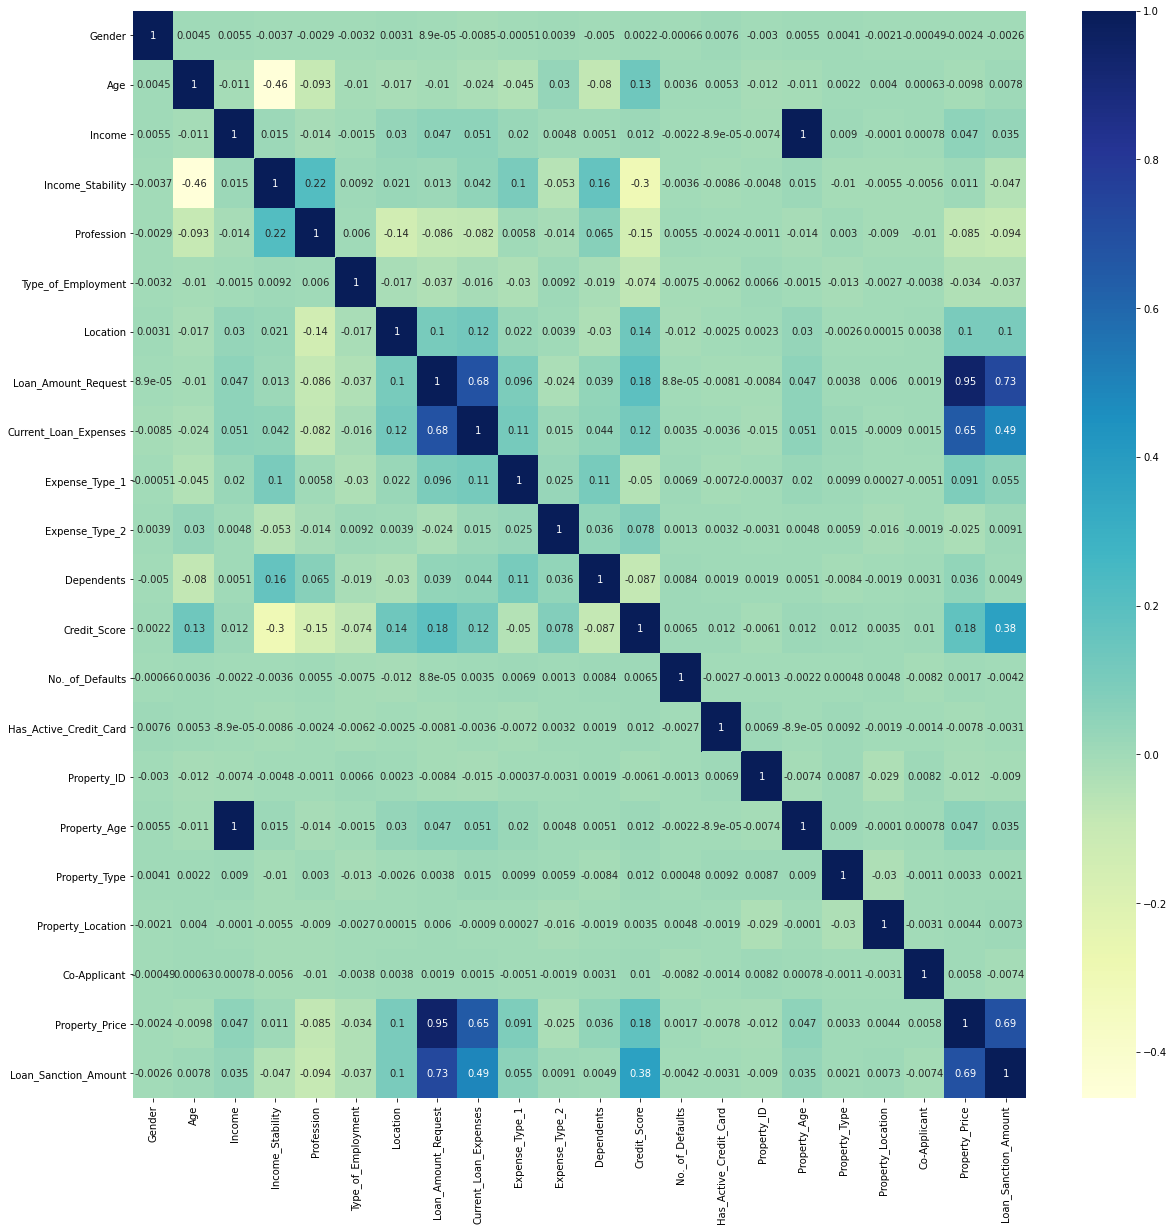

In [44]:
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [47]:
df1.to_csv('final_train_data.csv',index=False)